In [13]:
import numpy as np
import matplotlib.pyplot as plt
from src.fusion1d import main as fusion1d
from src.tools import *

matplotlib_settings()


ImportError: attempted relative import with no known parent package

In [72]:
# set params manually. see argparse settings in fusion2d for details.
# datafile = "ks_tr8_xr64_en1.npy"
datafile = "ks_tr8_xr128_en1.npy"
valid_n = 2000
epochs = 80
bs = 128
lr = 1e-3
l1,l2 = 8192,64
dp1,dp2 = 0.3,0.0
DEVRUN = False
MAKEFIGS = False
MAKEVIDS = False

out = fusion1d(datafile,valid_n,epochs,bs,lr,l1,l2,dp1,dp2,DEVRUN,MAKEFIGS,MAKEVIDS)
(train_x, train_y, train_r), (valid_x, valid_y, valid_r) = out

train_x train_y [(10250, 16), (10250, 2048)]
valid_x valid_y [(2000, 16), (2000, 2048)]


  0%|          | 0/80 [00:00<?, ?it/s]

Early stop. Min validation loss 161.44207849121094 on epoch 33
train_loss: 90.93532687781476
valid_loss: 164.21996778576226


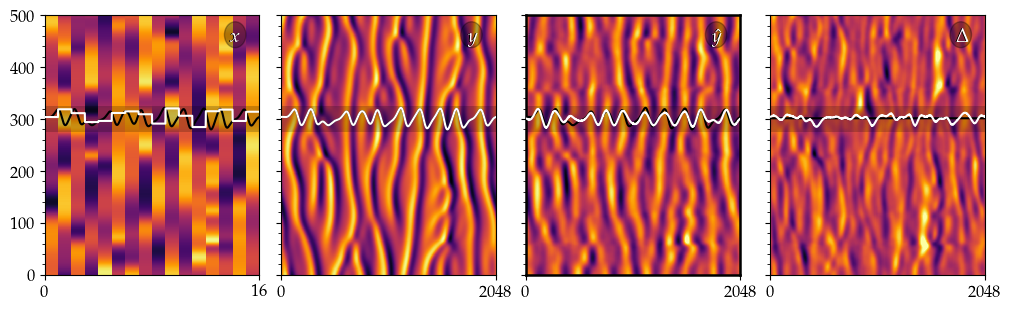

In [73]:
n = 500
ax = plot_1d_results(valid_x[:n,:], valid_y[:n,:], valid_r[:n,:], t=300)
for pos in ['top', 'bottom', 'right', 'left']:
    ax[2].spines[pos].set_linewidth(1.8)
plt.savefig(f"figs/fusion1d_valid.png",transparent=False, bbox_inches='tight', dpi=300)

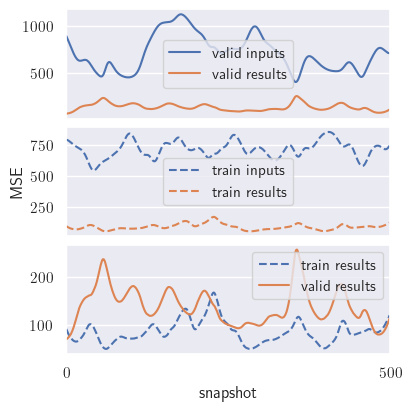

In [110]:
import seaborn 
seaborn.set()

fig,ax = plt.subplots(3,1,sharex=True,constrained_layout=True, figsize=(4,4))
ax[0].plot(mse(np.repeat(valid_x,2048//valid_x.shape[1],axis=1),valid_y)[:n],label="valid inputs")
ax[0].plot(mse(valid_r,valid_y)[:n],label="valid results")

ax[1].plot(mse(np.repeat(train_x,2048//train_x.shape[1],axis=1),train_y)[:n],'--',label="train inputs")
ax[1].plot(mse(train_r,train_y)[:n],'--',label="train results")

ax[2].plot(mse(train_r,train_y)[:n],'--',label="train results")
ax[2].plot(mse(valid_r,valid_y)[:n],label="valid results")

for axis in ax:
    axis.set_xlim([0,n])
    axis.set_xticks([0,n])
    axis.legend(loc='best')
    

ax[1].set_ylabel('MSE')
ax[2].set_xlabel('snapshot')
plt.savefig(f"figs/fusion1d_mse.png",transparent=False, bbox_inches='tight', dpi=300)

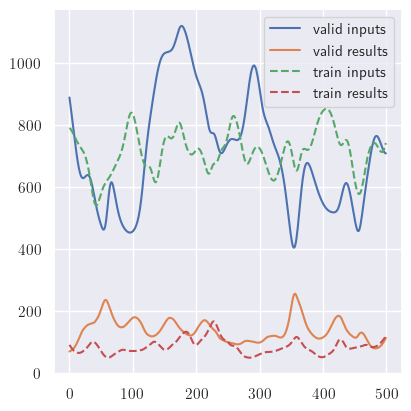

In [113]:
fig,ax = plt.subplots(1,1,sharex=True,constrained_layout=True, figsize=(4,4))
ax.plot(mse(np.repeat(valid_x,2048//valid_x.shape[1],axis=1),valid_y)[:n],label="valid inputs")
ax.plot(mse(valid_r,valid_y)[:n],label="valid results")

ax.plot(mse(np.repeat(train_x,2048//train_x.shape[1],axis=1),train_y)[:n],'--',label="train inputs")
ax.plot(mse(train_r,train_y)[:n],'--',label="train results")
ax.legend()